In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# import data
data = pd.read_csv('Datasets/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

In [5]:
# import ew columns
data['average score'] = data[[ 'writing score']].mean(axis=1)

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,74.0
1,female,group C,some college,standard,completed,69,90,88,88.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,44.0
4,male,group C,some college,standard,none,76,78,75,75.0


In [7]:
data.shape

(1000, 9)

In [8]:
data.size

9000

In [9]:
data.describe()

,math score,reading score,writing score,average score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,68.054000
std,15.16308,14.600192,15.195657,15.195657
min,0.00000,17.000000,10.000000,10.000000
25%,57.00000,59.000000,57.750000,57.750000
50%,66.00000,70.000000,69.000000,69.000000
75%,77.00000,79.000000,79.000000,79.000000
max,100.00000,100.000000,100.000000,100.000000


In [10]:
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [11]:
# checking null value in dataset
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average score                  0
dtype: int64

In [12]:
# gender value counts
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [13]:
# race/ethnicity value counts
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [14]:
# parental level of education value counts
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [15]:
# lunch value counts
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [16]:
# test preparation course value counts
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [17]:
# checking correlation 
corr = data.corr()
corr['average score'].sort_values(ascending = False)

writing score    1.000000
average score    1.000000
reading score    0.954598
math score       0.802642
Name: average score, dtype: float64

# Visulization

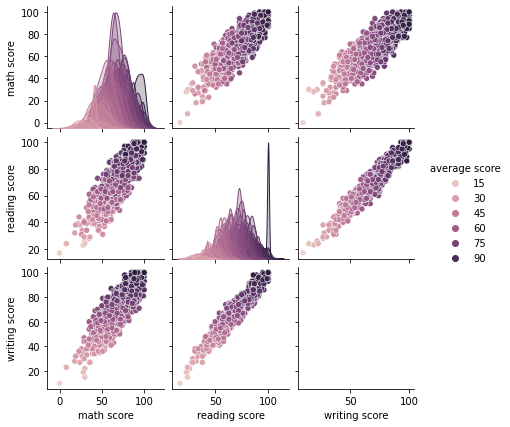

In [18]:
# pair plot
sns.pairplot(data,hue='average score',size=2)

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>,
        <AxesSubplot:title={'center':'average score'}>]], dtype=object)

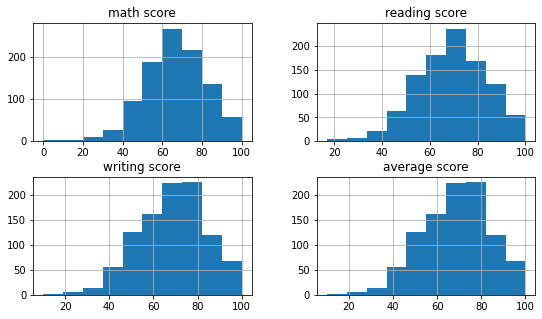

In [19]:
data.hist(figsize=(9,5))

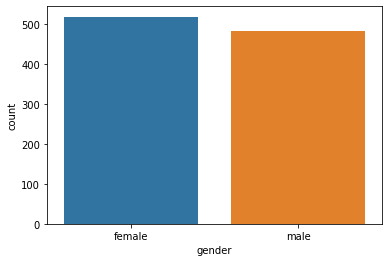

In [20]:
sns.countplot(data['gender'])
plt.show()

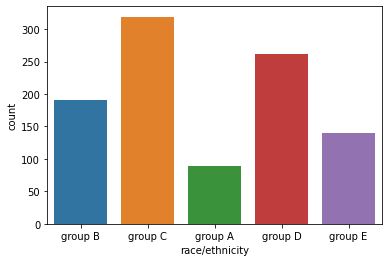

In [21]:
sns.countplot(data['race/ethnicity'])
plt.show()

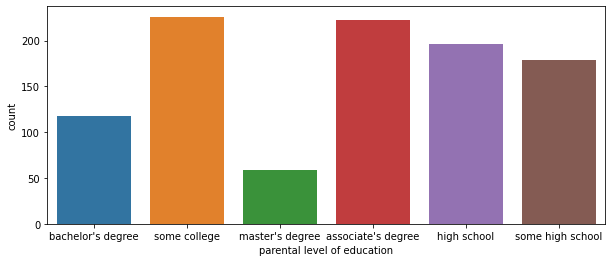

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data['parental level of education'])
plt.show()

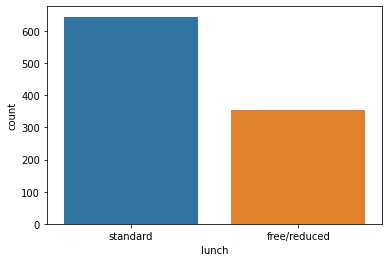

In [23]:
sns.countplot(data['lunch'])
plt.show()

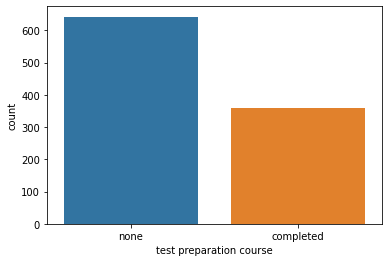

In [24]:
sns.countplot(data['test preparation course'])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='average score'>

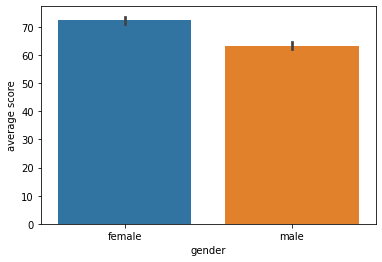

In [25]:
sns.barplot(data['gender'],data['average score'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='average score'>

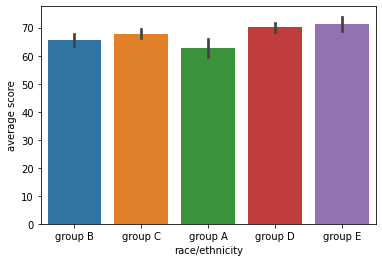

In [26]:
sns.barplot(data['race/ethnicity'],data['average score'])

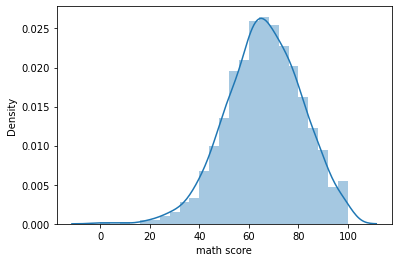

In [27]:
sns.distplot(data['math score'])
plt.show()

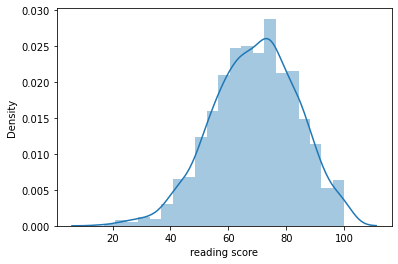

In [28]:
sns.distplot(data['reading score'])
plt.show()

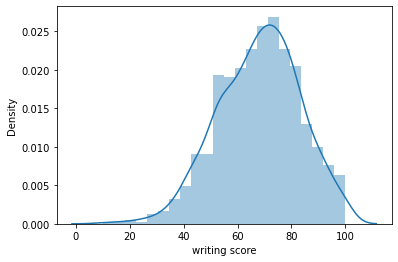

In [29]:
sns.distplot(data['writing score'])
plt.show()

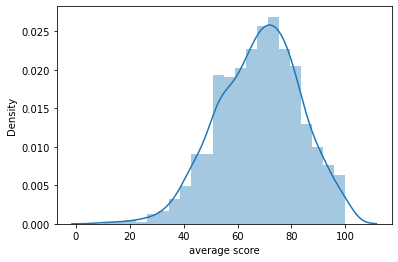

In [30]:
sns.distplot(data['average score'])
plt.show()

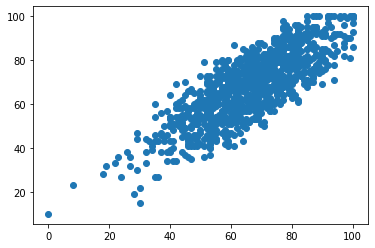

In [31]:
plt.scatter(data['math score'],data['average score'])

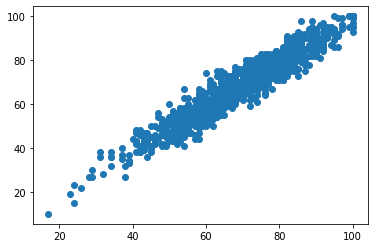

In [32]:
plt.scatter(data['reading score'],data['average score'])

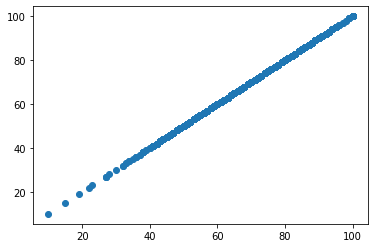

In [33]:
plt.scatter(data['writing score'],data['average score'])

<AxesSubplot:>

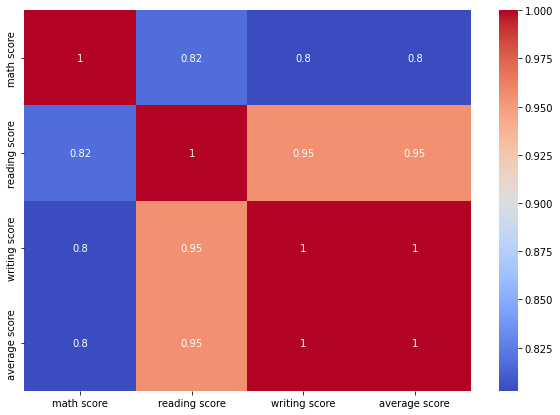

In [34]:
# heat map
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [35]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [36]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,0,1,1,1,1,72,72,74,74.0
1,0,2,4,1,0,69,90,88,88.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,44.0
4,1,2,4,1,1,76,78,75,75.0


# Data preprocessing

In [37]:
# treain_test_split
x = data.drop(columns=['average score'])
y = data['average score']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 13)

In [39]:
x_train.shape

(700, 8)

In [40]:
x_test.shape

(300, 8)

In [41]:
# LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.04

In [42]:
y_test

945    58.0
452    74.0
304    83.0
433    50.0
864    91.0
       ... 
679    60.0
140    71.0
321    79.0
613    74.0
960    64.0
Name: average score, Length: 300, dtype: float64

In [43]:
y_predict

array([ 70.,  70.,  90.,  61.,  76.,  69.,  70.,  81.,  70.,  82.,  42.,
        52.,  76.,  68.,  76.,  75.,  54.,  54.,  76.,  71.,  70.,  71.,
        71.,  76.,  69.,  67.,  69.,  40.,  42.,  90.,  54.,  70.,  75.,
        64.,  76.,  77.,  76.,  78.,  71.,  70.,  54.,  71.,  90.,  71.,
        71.,  76.,  81.,  65.,  65.,  70.,  54.,  67.,  70.,  67.,  70.,
        70.,  90.,  77.,  70.,  70.,  90.,  69.,  61.,  64.,  69.,  78.,
        78.,  76.,  70.,  76.,  73.,  77.,  71.,  85.,  76.,  54.,  67.,
        65.,  54.,  69.,  54.,  71.,  90.,  70.,  54.,  32.,  76.,  54.,
        52.,  76.,  52.,  54.,  54.,  54.,  54.,  71.,  54.,  71.,  81.,
        54.,  81.,  76.,  54.,  82.,  74.,  90.,  70.,  81.,  82.,  78.,
        71.,  81.,  71.,  54.,  70.,  90.,  54.,  71.,  82.,  76., 100.,
        71.,  71.,  52.,  54.,  81.,  76.,  70.,  67.,  77.,  67.,  71.,
        70.,  64.,  90.,  90.,  65.,  90.,  70.,  71.,  42.,  77.,  74.,
        64.,  70.,  81.,  82.,  70.,  54.,  65.,  7

In [44]:
pd.crosstab(y_test,y_predict)

col_0,32.0,40.0,42.0,46.0,52.0,54.0,60.0,61.0,64.0,65.0,...,75.0,76.0,77.0,78.0,81.0,82.0,85.0,90.0,91.0,100.0
average score,,,,,,,,,,,,,,,,,,,,,
22.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
97.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
confusion_matrix(y_test,y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         1
        33.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         2
        38.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        41.0       0.00      0.00      0.00         3
        42.0       0.00      0.00      0.00         2
        43.0       0.00      0.00      0.00         4
        44.0       0.00      0.00      0.00         4
        45.0       0.00      0.00      0.00         1
        46.0       0.00      0.00      0.00         4
        47.0       0.00      0.00      0.00         2
        48.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        50.0       0.00    

In [47]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.98

In [48]:
pd.crosstab(y_test,y_predict)

col_0,19.0,30.0,33.0,36.0,38.0,39.0,41.0,42.0,43.0,44.0,...,88.0,89.0,91.0,92.0,93.0,95.0,96.0,97.0,99.0,100.0
average score,,,,,,,,,,,,,,,,,,,,,
22.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
97.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
confusion_matrix(y_test,y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 5]])

In [50]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

        19.0       0.00      0.00      0.00         0
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        30.0       0.00      0.00      0.00         0
        32.0       0.00      0.00      0.00         1
        33.0       0.50      1.00      0.67         1
        36.0       0.33      1.00      0.50         1
        37.0       0.00      0.00      0.00         2
        38.0       1.00      1.00      1.00         1
        39.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         1
        41.0       1.00      1.00      1.00         3
        42.0       1.00      1.00      1.00         2
        43.0       1.00      1.00      1.00         4
        44.0       1.00      1.00      1.00         4
        45.0       1.00      1.00      1.00         1
        46.0       1.00      1.00      1.00         4
        47.0       1.00    

In [51]:
# MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.06

In [52]:
pd.crosstab(y_test,y_predict)

col_0,27.0,28.0,36.0,38.0,42.0,43.0,44.0,45.0,46.0,47.0,...,87.0,88.0,89.0,90.0,91.0,92.0,93.0,95.0,98.0,100.0
average score,,,,,,,,,,,,,,,,,,,,,
22.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
97.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
confusion_matrix(y_test,y_predict)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 3]])

In [54]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         0
        28.0       0.00      0.00      0.00         0
        32.0       0.00      0.00      0.00         1
        33.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         2
        38.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        41.0       0.00      0.00      0.00         3
        42.0       0.00      0.00      0.00         2
        43.0       1.00      0.25      0.40         4
        44.0       0.00      0.00      0.00         4
        45.0       0.00      0.00      0.00         1
        46.0       0.00      0.00      0.00         4
        47.0       0.00      0.00      0.00         2
        48.0       0.00    

In [55]:
# RandomForestClassifier 
model = RandomForestClassifier(random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.48333333333333334

In [56]:
pd.crosstab(y_test,y_predict)

col_0,27.0,33.0,34.0,36.0,38.0,41.0,42.0,43.0,44.0,45.0,...,86.0,87.0,89.0,90.0,91.0,92.0,93.0,95.0,96.0,100.0
average score,,,,,,,,,,,,,,,,,,,,,
22.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
97.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
confusion_matrix(y_test,y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 5]])

In [58]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         0
        32.0       0.00      0.00      0.00         1
        33.0       1.00      1.00      1.00         1
        34.0       0.00      0.00      0.00         0
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         2
        38.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        41.0       0.00      0.00      0.00         3
        42.0       0.25      0.50      0.33         2
        43.0       0.20      0.25      0.22         4
        44.0       1.00      0.50      0.67         4
        45.0       0.00      0.00      0.00         1
        46.0       0.00      0.00      0.00         4
        47.0       0.00      0.00      0.00         2
        48.0       0.00    

In [59]:
# KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([ 54.,  73.,  83.,  52.,  90.,  68.,  54.,  62.,  77., 100.,  54.,
        60.,  74.,  80., 100.,  79.,  65.,  70.,  74.,  61.,  77.,  68.,
        67., 100.,  55.,  66.,  52.,  34.,  40.,  78.,  43.,  77.,  77.,
        68.,  92.,  60.,  99.,  70.,  84.,  66.,  80.,  42.,  79.,  72.,
        75.,  82.,  76.,  54.,  70.,  85.,  65.,  74.,  70.,  68.,  67.,
        78.,  77.,  67.,  65.,  74.,  55.,  69.,  70.,  80.,  66.,  63.,
        67.,  89.,  83., 100.,  69.,  77.,  71.,  81., 100.,  53.,  45.,
        57.,  82.,  52.,  61.,  51.,  65.,  56.,  27.,  10.,  68.,  61.,
        42.,  62.,  42.,  80.,  57.,  57.,  52.,  58.,  77.,  63.,  79.,
        43.,  81.,  80.,  69.,  62.,  68.,  74.,  79.,  50.,  70.,  58.,
        71.,  83.,  72.,  78.,  76.,  82.,  72.,  67.,  85.,  85.,  90.,
        53.,  73.,  40.,  38.,  81.,  63.,  51.,  58.,  74.,  70.,  72.,
        74.,  45.,  74.,  62.,  61.,  64., 100.,  53.,  61.,  70.,  51.,
        90.,  74.,  81.,  63.,  74.,  53.,  75.,  6

In [60]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.2


In [61]:
confusion_matrix(y_test,y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 5]])

In [62]:
pd.crosstab(y_test,y_predict)

col_0,10.0,27.0,34.0,36.0,38.0,40.0,42.0,43.0,44.0,45.0,...,85.0,86.0,89.0,90.0,91.0,92.0,94.0,95.0,99.0,100.0
average score,,,,,,,,,,,,,,,,,,,,,
22.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
97.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
y_predict = model.predict(x_test)

In [64]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 5]]


<AxesSubplot:>

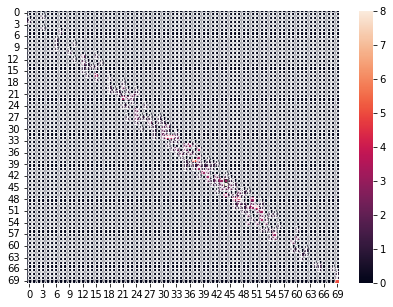

In [65]:
# heat map
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)

In [66]:
print('accuracy:',accuracy_score(y_test,y_predict))

accuracy: 0.2


In [67]:
confusion_matrix(y_test,y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 5]])

In [68]:
# XGBClassifier
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

[02:01:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.97

In [69]:
pd.crosstab(y_test,y_predict)

col_0,10.0,27.0,33.0,36.0,38.0,41.0,42.0,43.0,44.0,45.0,...,87.0,88.0,89.0,91.0,92.0,93.0,95.0,96.0,98.0,100.0
average score,,,,,,,,,,,,,,,,,,,,,
22.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
97.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# support victor machine
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.23333333333333334

In [71]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({74.0: 15, 80.0: 13, 62.0: 13, 73.0: 12, 78.0: 10, 70.0: 9, 68.0: 9, 69.0: 9, 65.0: 8, 77.0: 8, 72.0: 7, 57.0: 7, 64.0: 7, 52.0: 7, 66.0: 7, 79.0: 7, 81.0: 7, 75.0: 7, 51.0: 6, 84.0: 6, 82.0: 6, 58.0: 5, 83.0: 5, 50.0: 5, 59.0: 5, 60.0: 5, 100.0: 5, 76.0: 5, 71.0: 5, 86.0: 5, 88.0: 5, 61.0: 5, 67.0: 4, 44.0: 4, 43.0: 4, 46.0: 4, 91.0: 3, 87.0: 3, 54.0: 3, 49.0: 3, 41.0: 3, 37.0: 2, 96.0: 2, 89.0: 2, 42.0: 2, 55.0: 2, 95.0: 2, 92.0: 2, 47.0: 2, 56.0: 2, 63.0: 2, 97.0: 1, 99.0: 1, 36.0: 1, 32.0: 1, 23.0: 1, 53.0: 1, 40.0: 1, 48.0: 1, 93.0: 1, 33.0: 1, 85.0: 1, 45.0: 1, 22.0: 1, 38.0: 1})


col_0,27.0,34.0,36.0,38.0,41.0,42.0,43.0,45.0,47.0,48.0,...,83.0,85.0,86.0,89.0,90.0,91.0,92.0,93.0,95.0,100.0
average score,,,,,,,,,,,,,,,,,,,,,
22.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
97.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
# principle componet analysis
pca = PCA()
x = pd.DataFrame(pca.fit_transform(x))

In [73]:
x.head()

,0,1,2,3,4,5,6,7
0,-8.487747,1.219724,2.157169,1.348180,1.350982,-0.666731,-0.142238,-0.303208
1,-25.455269,-13.734690,-1.895955,-1.650581,0.069195,0.140351,0.603683,0.141236
2,-43.106303,-0.396454,-1.381207,-0.740291,1.464876,-0.610918,-0.307805,-0.168195
3,32.044639,-0.902461,-7.978718,2.922740,1.643124,0.372665,-0.200122,0.184217
4,-14.764860,2.038817,-1.514038,-1.542593,0.274628,-0.278461,0.008985,0.568824


In [74]:
pca.explained_variance_ratio_

array([8.98201128e-01, 7.96116601e-02, 1.47009401e-02, 4.88613812e-03,
       1.86202927e-03, 3.41846434e-04, 2.65177013e-04, 1.31080830e-04])

<AxesSubplot:>

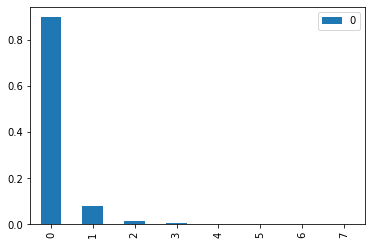

In [75]:
covid_var = pd.DataFrame(pca.explained_variance_ratio_)
covid_var.plot(kind = 'bar')

In [76]:
pca.explained_variance_ratio_[0:-1].sum()

0.9998689191701472

In [77]:
x = x.iloc[:,:-1]
x.head(5)

,0,1,2,3,4,5,6
0,-8.487747,1.219724,2.157169,1.348180,1.350982,-0.666731,-0.142238
1,-25.455269,-13.734690,-1.895955,-1.650581,0.069195,0.140351,0.603683
2,-43.106303,-0.396454,-1.381207,-0.740291,1.464876,-0.610918,-0.307805
3,32.044639,-0.902461,-7.978718,2.922740,1.643124,0.372665,-0.200122
4,-14.764860,2.038817,-1.514038,-1.542593,0.274628,-0.278461,0.008985


# Conclusion


In [78]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [79]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

[02:01:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Logistic Regression': 0.04,
 'Random Forest': 0.4533333333333333,
 'DecisionTree': 0.98,
 'KNN': 0.2,
 'MPL': 0.04,
 'XGB': 0.9766666666666667,
 'SVM': 0.04666666666666667}

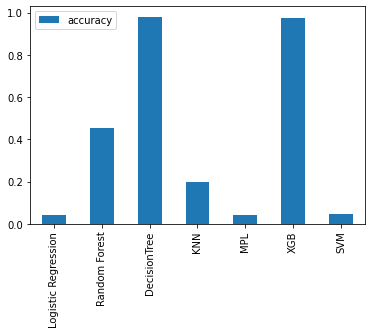

In [80]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();